In [46]:
# importing libraries
#from catboost import CatBoostClassifier
import catboost
import numpy
import torch
import torchvision
import pandas
import matplotlib.pyplot as plt
import matplotlib.seaborn as sns
from torchvision import transforms

%matplotlib inline

import time, os, csv

# to watch the progress
from tqdm import tqdm_notebook

ModuleNotFoundError: No module named 'matplotlib.seaborn'

In [2]:
# download datasets
datanames = ['Datas/viruses.csv', 'Datas/prokaryotes.csv', 'Datas/eukaryotes.csv']

euk_data = pandas.read_csv(datanames[2])
pro_data = pandas.read_csv(datanames[1])
vir_data = pandas.read_csv(datanames[0])

In [4]:
euk_data.head()

#Organism Name                    Organism Groups    Strain  \
0  Emiliania huxleyi CCMP1516  Eukaryota;Protists;Other Protists  CCMP1516   
1        Arabidopsis thaliana       Eukaryota;Plants;Land Plants       NaN   
2         Medicago truncatula       Eukaryota;Plants;Land Plants       A17   
3                 Glycine max       Eukaryota;Plants;Land Plants       NaN   
4        Solanum lycopersicum       Eukaryota;Plants;Land Plants       NaN   

      BioSample  BioProject         Assembly        Level  Size(Mb)      GC%  \
0  SAMN02744062  PRJNA77753  GCA_000372725.1     Scaffold   167.676  64.5000   
1  SAMN03081427  PRJNA10719  GCA_000001735.1   Chromosome   119.668  36.0528   
2  SAMN02299339  PRJNA10791  GCA_000219495.2   Chromosome   412.924  34.0470   
3  SAMN00002965  PRJNA19861  GCA_000004515.3   Chromosome   978.972  35.1208   
4  SAMN02981290    PRJNA119  GCA_000188115.2   Chromosome   823.786  35.7097   

                                           Replicons     WGS  Scaffolds  \
0                                                NaN  AHAL01       7795   
1  chromosome 1:NC_003070.9/CP002684.1; chromosom...     NaN          7   
2  chromosome 1:NC_016407.2/CM001217.2; chromosom...  APNO01       2187   
3  chromosome 1:NC_016088.2/CM000834.2; chromosom...  ACUP02       1191   
4  chromosome 1:NC_015438.2/CM001064.2; chromosom...  AEKE02       3224   

     CDS          Release Date  \
0  38554  2013-04-19T00:00:00Z   
1  48350  2001-08-13T00:00:00Z   
2  57661  2011-08-12T00:00:00Z   
3  71525  2010-01-05T00:00:00Z   
4  36010  2010-12-10T00:00:00Z   

                                         GenBank FTP  \
0  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
1  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
2  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
3  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
4  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   

                                          RefSeq FTP  
0  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
1  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
2  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
3  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
4  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...

In [5]:
euk_data.tail()

#Organism Name              Organism Groups       Strain  \
5126  Saccharomyces cerevisiae  Eukaryota;Fungi;Ascomycetes          NaN   
5127  Saccharomyces cerevisiae  Eukaryota;Fungi;Ascomycetes        ZP848   
5128  Saccharomyces cerevisiae  Eukaryota;Fungi;Ascomycetes      VKMY373   
5129  Saccharomyces cerevisiae  Eukaryota;Fungi;Ascomycetes          245   
5130  Saccharomyces cerevisiae  Eukaryota;Fungi;Ascomycetes  M2ONO800_1A   

         BioSample BioProject         Assembly     Level  Size(Mb)   GC%  \
5126  SAMEA3110475  PRJEB7675  GCA_900178465.1  Scaffold   12.0392  38.1   
5127  SAMEA3110493  PRJEB7675  GCA_900178475.1  Scaffold   11.7086  38.1   
5128  SAMEA3110473  PRJEB7675  GCA_900178485.1  Scaffold   11.8194  38.0   
5129  SAMEA3110476  PRJEB7675  GCA_900178495.1  Scaffold   11.7081  38.1   
5130  SAMEA3110463  PRJEB7675  GCA_900178505.1  Scaffold   11.8189  38.1   

     Replicons     WGS  Scaffolds  CDS          Release Date  \
5126       NaN  FXDE01       1925    0  2017-04-21T00:00:00Z   
5127       NaN  FXCK01        590    0  2017-04-21T00:00:00Z   
5128       NaN  FXCO01       2013    0  2017-04-21T00:00:00Z   
5129       NaN  FXCP01       1028    0  2017-04-21T00:00:00Z   
5130       NaN  FXCG01        799    0  2017-04-21T00:00:00Z   

                                            GenBank FTP RefSeq FTP  
5126  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900...        NaN  
5127  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900...        NaN  
5128  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900...        NaN  
5129  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900...        NaN  
5130  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900...        NaN

In [6]:
euk_data.shape # just shape

(5131, 16)

In [7]:
euk_data.groupby('GC%').sum().sample(5) # WTF

Size(Mb)  Scaffolds     CDS
GC%                                   
38.3887    12.40650         18    5431
37.9000  1028.73760      28533  155898
39.0999  1688.47000     159548   48963
58.0000   128.80427       7228       0
59.2021    31.26910        168       0

In [11]:
euk_data.groupby('GC%').mean().sample(5)

Size(Mb)      Scaffolds          CDS
GC%                                             
49.4000    36.609114    1104.238095  4147.428571
27.8000    63.164387    5651.666667  1215.333333
58.5000    28.574450     273.750000     0.000000
38.3003    11.884400     124.000000     0.000000
36.5000  2723.174975  292089.666667     0.000000

In [13]:
euk_data[['GC%', 'Level', 'Assembly']].head()

GC%        Level         Assembly
0  64.5000     Scaffold  GCA_000372725.1
1  36.0528   Chromosome  GCA_000001735.1
2  34.0470   Chromosome  GCA_000219495.2
3  35.1208   Chromosome  GCA_000004515.3
4  35.7097   Chromosome  GCA_000188115.2

In [14]:
euk_data[numpy.logical_not(euk_data['GC%'] <= 70)] # spices with GC > 70%

#Organism Name               Organism Groups    Strain  \
2620  Prototheca stagnorum  Eukaryota;Plants;Green Algae  JCM 9641   

         BioSample BioProject         Assembly     Level  Size(Mb)   GC%  \
2620  SAMD00028436  PRJDB3715  GCA_002794665.1  Scaffold   16.8962  71.4   

     Replicons     WGS  Scaffolds  CDS          Release Date  \
2620       NaN  BCJY01         27    0  2017-11-16T00:00:00Z   

                                            GenBank FTP RefSeq FTP  
2620  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...        NaN

In [15]:
print([sum(pandas.isnull(euk_data[euk_data.columns[i]])) for i in range(len(euk_data.columns))]) # count NaN in each column

[0, 0, 969, 22, 0, 0, 0, 0, 0, 4063, 339, 0, 0, 54, 6, 4272]


In [16]:
euk_data.Level.value_counts(dropna=False) # WTF 

Scaffold       3350
Contig          989
 Chromosome     756
Complete         36
Name: Level, dtype: int64

In [17]:
#euk_data.columns = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P'] # change names to alphabet letters
#euk_data

In [19]:
euk_data.reset_index()

index                       #Organism Name  \
0         0           Emiliania huxleyi CCMP1516   
1         1                 Arabidopsis thaliana   
2         2                  Medicago truncatula   
3         3                          Glycine max   
4         4                 Solanum lycopersicum   
5         5                      Hordeum vulgare   
6         6          Oryza sativa Japonica Group   
7         7                    Triticum aestivum   
8         8                             Zea mays   
9         9             Pneumocystis carinii B80   
10       10            Schizosaccharomyces pombe   
11       11       Saccharomyces cerevisiae S288C   
12       12          Phanerochaete chrysosporium   
13       13              Candida albicans SC5314   
14       14         Aspergillus nidulans FGSC A4   
15       15          Aspergillus fumigatus Af293   
16       16              Neurospora crassa OR74A   
17       17     Leishmania major strain Friedlin   
18       18                    Trypanosoma cruzi   
19       19           Giardia lamblia ATCC 50803   
20       20      Entamoeba histolytica HM-1:IMSS   
21       21  Trypanosoma brucei gambiense DAL972   
22       22                      Eimeria tenella   
23       23       Cryptosporidium parvum Iowa II   
24       24               Toxoplasma gondii ME49   
25       25              Plasmodium berghei ANKA   
26       26            Plasmodium falciparum 3D7   
27       27         Plasmodium chabaudi chabaudi   
28       28         Plasmodium knowlesi strain H   
29       29                     Plasmodium vivax   
...     ...                                  ...   
5101   5101             Saccharomyces cerevisiae   
5102   5102             Saccharomyces cerevisiae   
5103   5103             Saccharomyces cerevisiae   
5104   5104             Saccharomyces cerevisiae   
5105   5105             Saccharomyces cerevisiae   
5106   5106             Saccharomyces cerevisiae   
5107   5107             Saccharomyces cerevisiae   
5108   5108             Saccharomyces cerevisiae   
5109   5109             Saccharomyces cerevisiae   
5110   5110             Saccharomyces cerevisiae   
5111   5111             Saccharomyces cerevisiae   
5112   5112             Saccharomyces cerevisiae   
5113   5113             Saccharomyces cerevisiae   
5114   5114             Saccharomyces cerevisiae   
5115   5115             Saccharomyces cerevisiae   
5116   5116             Saccharomyces cerevisiae   
5117   5117             Saccharomyces cerevisiae   
5118   5118             Saccharomyces cerevisiae   
5119   5119             Saccharomyces cerevisiae   
5120   5120             Saccharomyces cerevisiae   
5121   5121             Saccharomyces cerevisiae   
5122   5122             Saccharomyces cerevisiae   
5123   5123             Saccharomyces cerevisiae   
5124   5124             Saccharomyces cerevisiae   
5125   5125             Saccharomyces cerevisiae   
5126   5126             Saccharomyces cerevisiae   
5127   5127             Saccharomyces cerevisiae   
5128   5128             Saccharomyces cerevisiae   
5129   5129             Saccharomyces cerevisiae   
5130   5130             Saccharomyces cerevisiae   

                        Organism Groups                               Strain  \
0     Eukaryota;Protists;Other Protists                             CCMP1516   
1          Eukaryota;Plants;Land Plants                                  NaN   
2          Eukaryota;Plants;Land Plants                                  A17   
3          Eukaryota;Plants;Land Plants                                  NaN   
4          Eukaryota;Plants;Land Plants                                  NaN   
5          Eukaryota;Plants;Land Plants                                  NaN   
6          Eukaryota;Plants;Land Plants                                  NaN   
7          Eukaryota;Plants;Land Plants                                  NaN   
8          Eukaryota;Plants;Land Plants                      

In [21]:
euk_data[euk_data.Level == 'Scaffold'].sample(5)

#Organism Name                 Organism Groups  \
4307                   Homo sapiens       Eukaryota;Animals;Mammals   
3512                 Trichuris suis    Eukaryota;Animals;Roundworms   
2320  Rachicladosporium antarcticum     Eukaryota;Fungi;Ascomycetes   
2008                   Bullera alba  Eukaryota;Fungi;Basidiomycetes   
144            Drosophila grimshawi       Eukaryota;Animals;Insects   

                 Strain     BioSample   BioProject         Assembly     Level  \
4307                AK1  SAMN04169050  PRJNA298944  GCA_001750385.2  Scaffold   
3512         DCEP-RM93F  SAMN02423287  PRJNA208416  GCA_000701025.1  Scaffold   
2320         CCFEE 5527  SAMN06285182  PRJNA342238  GCA_002077065.1  Scaffold   
2008           JCM 2954  SAMD00028405    PRJDB3685  GCA_001600095.1  Scaffold   
144   TSC#15287-2541.00  SAMN02953650   PRJNA12678  GCA_000005155.1  Scaffold   

       Size(Mb)   GC% Replicons     WGS  Scaffolds    CDS  \
4307  2904.2100  41.0       NaN  LPVO02       2832      0   
3512    71.0564  43.6       NaN  JMHZ01       3284  14262   
2320    47.4106  54.9       NaN  NAJO01        267  18781   
2008    19.4173  54.3       NaN  BCIX01          8      0   
144    200.4680  38.8       NaN  AAPT01      17440  14986   

              Release Date                                        GenBank FTP  \
4307  2016-09-30T00:00:00Z  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...   
3512  2014-06-11T00:00:00Z  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
2320  2017-04-03T00:00:00Z  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...   
2008  2016-03-01T00:00:00Z  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...   
144   2006-04-11T00:00:00Z  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   

                                             RefSeq FTP  
4307                                                NaN  
3512                                                NaN  
2320                                                NaN  
2008                                                NaN  
144   ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...

In [25]:
pandas.concat([euk_data['GC%'], euk_data['Level']], axis=0)

0           64.5
1        36.0528
2         34.047
3        35.1208
4        35.7097
5              0
6        43.5769
7           46.1
8        46.9109
9           27.8
10       36.0381
11       38.1556
12          56.5
13       33.4827
14       50.2721
15       49.8105
16       48.2319
17       59.7114
18          51.7
19          49.2
20          24.3
21       47.1525
22       51.0796
23       30.2256
24       52.2873
25       22.2913
26        19.363
27       23.6106
28       39.1684
29       42.2825
          ...   
5101    Scaffold
5102    Scaffold
5103    Scaffold
5104    Scaffold
5105    Scaffold
5106    Scaffold
5107    Scaffold
5108    Scaffold
5109    Scaffold
5110    Scaffold
5111    Scaffold
5112    Scaffold
5113    Scaffold
5114    Scaffold
5115    Scaffold
5116    Scaffold
5117    Scaffold
5118    Scaffold
5119    Scaffold
5120    Scaffold
5121    Scaffold
5122    Scaffold
5123    Scaffold
5124    Scaffold
5125    Scaffold
5126    Scaffold
5127    Scaffold
5128    Scaffo

In [26]:
euk_data[numpy.logical_or(euk_data.Level == 'Scaffold', euk_data.Level == 'Contig')]

#Organism Name  \
0                  Emiliania huxleyi CCMP1516   
5                             Hordeum vulgare   
7                           Triticum aestivum   
9                    Pneumocystis carinii B80   
12                Phanerochaete chrysosporium   
14               Aspergillus nidulans FGSC A4   
18                          Trypanosoma cruzi   
19                 Giardia lamblia ATCC 50803   
20            Entamoeba histolytica HM-1:IMSS   
22                            Eimeria tenella   
36                              Brugia malayi   
38                           Aedes albopictus   
46                Aspergillus terreus NIH2624   
48               Glossina morsitans morsitans   
50                  Guillardia theta CCMP2712   
52               Saccharomyces bayanus 623-6C   
53             Saccharomyces mikatae IFO 1815   
56          Saccharomyces kudriavzevii FM1066   
58                             Ciona savignyi   
64           Coprinopsis cinerea okayama7#130   
67                     Branchiostoma floridae   
68                                Bombyx mori   
77              Strongylocentrotus purpuratus   
78                 Lachancea waltii NCYC 2644   
79    Coccidioides posadasii C735 delta SOWgp   
80                            Lotus japonicus   
85                 Struthio camelus australis   
86                           Ciconia boyciana   
87                           Falco peregrinus   
89                     Gasterosteus aculeatus   
...                                       ...   
5101                 Saccharomyces cerevisiae   
5102                 Saccharomyces cerevisiae   
5103                 Saccharomyces cerevisiae   
5104                 Saccharomyces cerevisiae   
5105                 Saccharomyces cerevisiae   
5106                 Saccharomyces cerevisiae   
5107                 Saccharomyces cerevisiae   
5108                 Saccharomyces cerevisiae   
5109                 Saccharomyces cerevisiae   
5110                 Saccharomyces cerevisiae   
5111                 Saccharomyces cerevisiae   
5112                 Saccharomyces cerevisiae   
5113                 Saccharomyces cerevisiae   
5114                 Saccharomyces cerevisiae   
5115                 Saccharomyces cerevisiae   
5116                 Saccharomyces cerevisiae   
5117                 Saccharomyces cerevisiae   
5118                 Saccharomyces cerevisiae   
5119                 Saccharomyces cerevisiae   
5120                 Saccharomyces cerevisiae   
5121                 Saccharomyces cerevisiae   
5122                 Saccharomyces cerevisiae   
5123                 Saccharomyces cerevisiae   
5124                 Saccharomyces cerevisiae   
5125                 Saccharomyces cerevisiae   
5126                 Saccharomyces cerevisiae   
5127                 Saccharomyces cerevisiae   
5128                 Saccharomyces cerevisiae   
5129                 Saccharomyces cerevisiae   
5130                 Saccharomyces cerevisiae   

                        Organism Groups            Strain     BioSample  \
0     Eukaryota;Protists;Other Protists          CCMP1516  SAMN02744062   
5          Eukaryota;Plants;Land Plants               NaN  SAMEA3903302   
7          Eukaryota;Plants;Land Plants               NaN  SAMN07284949   
9           Eukaryota;Fungi;Ascomycetes               B80  SAMN02380717   
12       Eukaryota;Fungi;Basidiomycetes        ATCC 20696  SAMN05790961   
14          Eukaryota;Fungi;Ascomycetes           FGSC A4  SAMN02953587   
18      Eukaryota;Protists;Kinetoplasts         CL Brener  SAMN02953627   
19    Eukaryota;Protists;Other Protists             WB C6  SAMN02952905   
20    Eukaryota;Protists;Other Protists         HM-1:IMSS  SAMN02953605   
22     Eukaryota;Protists;Apicomplexans          Houghton  SAMEA3138819   
36         Eukaryota;Animals;Roundworms               NaN  SAMN02953652   
38            Eukaryota;Animals;Insects             C6/36  SAMN05908721   
46          Eukar

In [27]:
euk_data.iloc[0][0]

'Emiliania huxleyi CCMP1516'

In [29]:
euk_data[euk_data.Level.isin(['Scaffold', 'Contig'])]

#Organism Name  \
0                  Emiliania huxleyi CCMP1516   
5                             Hordeum vulgare   
7                           Triticum aestivum   
9                    Pneumocystis carinii B80   
12                Phanerochaete chrysosporium   
14               Aspergillus nidulans FGSC A4   
18                          Trypanosoma cruzi   
19                 Giardia lamblia ATCC 50803   
20            Entamoeba histolytica HM-1:IMSS   
22                            Eimeria tenella   
36                              Brugia malayi   
38                           Aedes albopictus   
46                Aspergillus terreus NIH2624   
48               Glossina morsitans morsitans   
50                  Guillardia theta CCMP2712   
52               Saccharomyces bayanus 623-6C   
53             Saccharomyces mikatae IFO 1815   
56          Saccharomyces kudriavzevii FM1066   
58                             Ciona savignyi   
64           Coprinopsis cinerea okayama7#130   
67                     Branchiostoma floridae   
68                                Bombyx mori   
77              Strongylocentrotus purpuratus   
78                 Lachancea waltii NCYC 2644   
79    Coccidioides posadasii C735 delta SOWgp   
80                            Lotus japonicus   
85                 Struthio camelus australis   
86                           Ciconia boyciana   
87                           Falco peregrinus   
89                     Gasterosteus aculeatus   
...                                       ...   
5101                 Saccharomyces cerevisiae   
5102                 Saccharomyces cerevisiae   
5103                 Saccharomyces cerevisiae   
5104                 Saccharomyces cerevisiae   
5105                 Saccharomyces cerevisiae   
5106                 Saccharomyces cerevisiae   
5107                 Saccharomyces cerevisiae   
5108                 Saccharomyces cerevisiae   
5109                 Saccharomyces cerevisiae   
5110                 Saccharomyces cerevisiae   
5111                 Saccharomyces cerevisiae   
5112                 Saccharomyces cerevisiae   
5113                 Saccharomyces cerevisiae   
5114                 Saccharomyces cerevisiae   
5115                 Saccharomyces cerevisiae   
5116                 Saccharomyces cerevisiae   
5117                 Saccharomyces cerevisiae   
5118                 Saccharomyces cerevisiae   
5119                 Saccharomyces cerevisiae   
5120                 Saccharomyces cerevisiae   
5121                 Saccharomyces cerevisiae   
5122                 Saccharomyces cerevisiae   
5123                 Saccharomyces cerevisiae   
5124                 Saccharomyces cerevisiae   
5125                 Saccharomyces cerevisiae   
5126                 Saccharomyces cerevisiae   
5127                 Saccharomyces cerevisiae   
5128                 Saccharomyces cerevisiae   
5129                 Saccharomyces cerevisiae   
5130                 Saccharomyces cerevisiae   

                        Organism Groups            Strain     BioSample  \
0     Eukaryota;Protists;Other Protists          CCMP1516  SAMN02744062   
5          Eukaryota;Plants;Land Plants               NaN  SAMEA3903302   
7          Eukaryota;Plants;Land Plants               NaN  SAMN07284949   
9           Eukaryota;Fungi;Ascomycetes               B80  SAMN02380717   
12       Eukaryota;Fungi;Basidiomycetes        ATCC 20696  SAMN05790961   
14          Eukaryota;Fungi;Ascomycetes           FGSC A4  SAMN02953587   
18      Eukaryota;Protists;Kinetoplasts         CL Brener  SAMN02953627   
19    Eukaryota;Protists;Other Protists             WB C6  SAMN02952905   
20    Eukaryota;Protists;Other Protists         HM-1:IMSS  SAMN02953605   
22     Eukaryota;Protists;Apicomplexans          Houghton  SAMEA3138819   
36         Eukaryota;Animals;Roundworms               NaN  SAMN02953652   
38            Eukaryota;Animals;Insects             C6/36  SAMN05908721   
46          Eukar

In [30]:
euk_data.columns = [name.lower() for name in euk_data.columns]

In [31]:
euk_data.columns = [name.upper() for name in euk_data.columns]

In [ ]:
# ALL COMANDS (no)
'''
data.head(length)                             
data.tail(length)
data.sample(length)
data.shape
data.groupby(column).count()
data.groupby(column).sum()
data.groupby(column).mean()
numpy.isnan(data)
pandas.isnull(data)
data.column.value_counts(dropna=False)
data.columns
data.colums = [names]
data[[col, col ,..]].comand()
'''

In [33]:
euk_data[euk_data['GC%'] > 50]

#ORGANISM NAME                    ORGANISM GROUPS  \
0             Emiliania huxleyi CCMP1516  Eukaryota;Protists;Other Protists   
12           Phanerochaete chrysosporium     Eukaryota;Fungi;Basidiomycetes   
14          Aspergillus nidulans FGSC A4        Eukaryota;Fungi;Ascomycetes   
17      Leishmania major strain Friedlin    Eukaryota;Protists;Kinetoplasts   
18                     Trypanosoma cruzi    Eukaryota;Protists;Kinetoplasts   
22                       Eimeria tenella   Eukaryota;Protists;Apicomplexans   
24                Toxoplasma gondii ME49   Eukaryota;Protists;Apicomplexans   
46           Aspergillus terreus NIH2624        Eukaryota;Fungi;Ascomycetes   
50             Guillardia theta CCMP2712              Eukaryota;Other;Other   
55              Magnaporthe oryzae 70-15        Eukaryota;Fungi;Ascomycetes   
63                   Ustilago maydis 521     Eukaryota;Fungi;Basidiomycetes   
64      Coprinopsis cinerea okayama7#130     Eukaryota;Fungi;Basidiomycetes   
66      Eremothecium gossypii ATCC 10895        Eukaryota;Fungi;Ascomycetes   
70    Cyanidioschyzon merolae strain 10D              Eukaryota;Other;Other   
90             Chlamydomonas reinhardtii       Eukaryota;Plants;Green Algae   
114                   Phytophthora sojae  Eukaryota;Protists;Other Protists   
116                 Phytophthora ramorum  Eukaryota;Protists;Other Protists   
134           Neospora caninum Liverpool   Eukaryota;Protists;Apicomplexans   
135            Leishmania infantum JPCM5    Eukaryota;Protists;Kinetoplasts   
155   Acanthamoeba castellanii str. Neff  Eukaryota;Protists;Other Protists   
161         Phytophthora infestans T30-4  Eukaryota;Protists;Other Protists   
163       Chaetomium globosum CBS 148.51        Eukaryota;Fungi;Ascomycetes   
164     Euglena gracilis var. bacillaris  Eukaryota;Protists;Other Protists   
168              Trichoderma reesei QM6a        Eukaryota;Fungi;Ascomycetes   
172      Allomyces macrogynus ATCC 38327        Eukaryota;Fungi;Other Fungi   
184           Schizophyllum commune H4-8     Eukaryota;Fungi;Basidiomycetes   
198                   Ostreococcus tauri       Eukaryota;Plants;Green Algae   
210     Ostreococcus lucimarinus CCE9901       Eukaryota;Plants;Green Algae   
213        Volvox carteri f. nagariensis       Eukaryota;Plants;Green Algae   
218          Aureococcus anophagefferens  Eukaryota;Protists;Other Protists   
...                                  ...                                ...   
4574                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4581                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4584                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4590          Magnaporthe oryzae HN19311        Eukaryota;Fungi;Ascomycetes   
4593          Magnaporthe oryzae FJ81278        Eukaryota;Fungi;Ascomycetes   
4598                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4601                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4606                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4609                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4626                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4629                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4632                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4635                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4638                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4641                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4644                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4647                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4650                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes   
4653                  Magnaporthe oryzae        Eukaryota;Fungi;Ascomycetes 

In [34]:
euk_data[euk_data['GC%'] < 30]

#ORGANISM NAME  \
5                              Hordeum vulgare   
9                     Pneumocystis carinii B80   
20             Entamoeba histolytica HM-1:IMSS   
25                     Plasmodium berghei ANKA   
26                   Plasmodium falciparum 3D7   
27                Plasmodium chabaudi chabaudi   
49                Dictyostelium discoideum AX4   
59                           Plasmodium yoelii   
118              Tetrahymena thermophila SB210   
122                     Schmidtea mediterranea   
132                      Plasmodium reichenowi   
147                          Meloidogyne hapla   
153                     Paramecium tetraurelia   
157                      Meloidogyne incognita   
159                         Petromyzon marinus   
173               Ichthyophthirius multifiliis   
182                 Sterkiella histriomuscorum   
197                    Entamoeba dispar SAW760   
249                 Pediculus humanus corporis   
312                 Cryptosporidium muris RN66   
330                       Nosema ceranae BRL01   
344    Hamiltosporidium tvaerminnensis OER-3-3   
363                       Wuchereria bancrofti   
379                        Onchocerca volvulus   
397                   Dictyostelium firmibasis   
399                  Dictyostelium intermedium   
445                    Dictyostelium purpureum   
466                        Strongyloides ratti   
475       Hanseniaspora valbyensis NRRL Y-1626   
503                        Philaenus spumarius   
...                                        ...   
4345       Plasmodium falciparum MaliPS096_E11   
4363  Plasmodium falciparum Tanzania (2000708)   
4372         Plasmodium falciparum NF135/5.C10   
4379            Microbotryum lychnidis-dioicae   
4385    Plasmodium falciparum Palo Alto/Uganda   
4394       Plasmodium falciparum CAMP/Malaysia   
4410               Plasmodium falciparum 327.1   
4419               Plasmodium falciparum 377.1   
4426               Plasmodium falciparum 318.1   
4435               Plasmodium falciparum 383.1   
4442               Plasmodium falciparum 366.1   
4451               Plasmodium falciparum 398.1   
4458                Plasmodium falciparum 58.1   
4467               Plasmodium falciparum 303.1   
4474               Plasmodium falciparum 309.1   
4482               Plasmodium falciparum 365.1   
4489               Plasmodium falciparum 397.1   
4496               Plasmodium falciparum 326.1   
4503                Plasmodium falciparum NF54   
4513                          Candida albicans   
4528                              Homo sapiens   
4533                              Homo sapiens   
4540                              Homo sapiens   
4544                        Magnaporthe oryzae   
4551                        Magnaporthe oryzae   
4554                        Magnaporthe oryzae   
4586                              Homo sapiens   
4614                        Magnaporthe oryzae   
4620                        Magnaporthe oryzae   
5076                  Saccharomyces cerevisiae   

                        ORGANISM GROUPS              STRAIN       BIOSAMPLE  \
5          Eukaryota;Plants;Land Plants                 NaN    SAMEA3903302   
9           Eukaryota;Fungi;Ascomycetes                 B80    SAMN02380717   
20    Eukaryota;Protists;Other Protists           HM-1:IMSS    SAMN02953605   
25     Eukaryota;Protists;Apicomplexans                ANKA     SAMEA736069   
26     Eukaryota;Protists;Apicomplexans                 3D7             NaN   
27     Eukaryota;Protists;Apicomplexans                  AS     SAMEA768774   
49    Eukaryota;Protists;Other Protists                 AX4    SAMN02953606   
59     Eukaryota;Protists;Apicomplexans                 17X    SAMEA1032065   
118   Eukaryota;Protists;Other Protists               SB210    SAMN02953617   
122         Eukaryota;Animals;Flatworms                  S2    SAMN06660624   
132    Eukaryota;Protists;Apicomplexans                SY57   

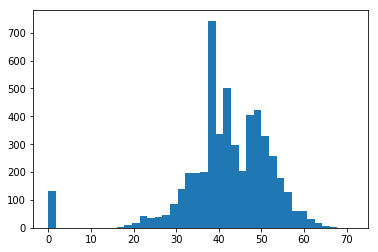

In [35]:
plt.hist(euk_data['GC%'], bins=40)
plt.show()

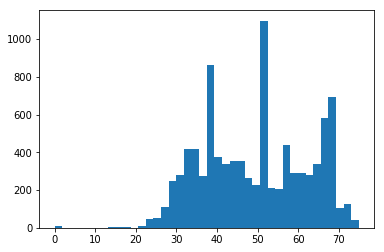

In [36]:
plt.hist(pro_data['GC%'], bins=40)
plt.show()

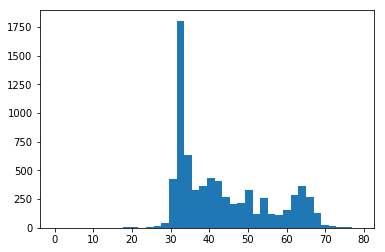

In [37]:
plt.hist(vir_data['GC%'], bins=40)
plt.show()

In [38]:
euk_data['GC%'].mean()

42.03649746638098

In [39]:
pro_data['GC%'].mean()

49.34224149288858

In [40]:
vir_data['GC%'].mean()

43.230326854115724

In [42]:
euk_data['GC%'].median()

42.0

In [43]:
pro_data['GC%'].median()

50.5948

In [44]:
vir_data['GC%'].median()

39.5